#### ALL THE COLUMNS IN THE DATA ARE
#### hotel-The datasets contains the booking information of two hotel. One of the hotels is a resort hotel and the other is a city
#### is_canceled - Value indicating if the booking was canceled (1) or not (0).
#### lead_time - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.
#### arrival_date_year-Year of arrival date
#### arrival_date_month - Month of arrival date with 12 categories: “January” to “December”
#### arrival_date_week_number - Week number of the arrival date
#### arrival_date_day_of_month - Day of the month of the arrival date
#### stays_in_weekend_nights - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
#### stays_in_week_nights - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel BO and BL/Calculated by counting
#### adults - Number of adults
#### children - Number of children

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plot

## CSV to Dataframe

In [3]:
hotel = pd.read_csv("F:/Datasets/hotel_booking.csv")

In [4]:
hotel.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


### 1. Data types of column in hotel 

In [5]:
hotel.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# ---------------------------------------------------------------------------------------------------------------

## 2. check how many column have values greater than one so we can find a suitable solution to the Null values

In [6]:
null = hotel.isnull().sum()
null1=list(null[null>1].items())
print(null1)

[('children', 4), ('country', 488), ('agent', 16340), ('company', 112593)]


In [7]:
hotel['children'].fillna(0,inplace=True)

#### I replace null in childrens column beacuse couples and families which have children can easily seen by naked eyes so due to some error of data entry operator . there is null values in children column

In [8]:
hotel.children.isna().sum()

0

##### solution for nulls in company column as we see there are total 112593 entries are null which is almost 95 %  column are not suitable fot eda

In [9]:
hotel.drop(['company'],axis=1,inplace=True)

# ---------------------------------------------------------------------------------------------------------------

## 3. lets understand different statistics of hotel

In [12]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## 4. lets understand different statistics of hotel with different aspects of hotel

In [13]:
hotel.describe(include=object)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461,48,6,1,28


# ---------------------------------------------------------------------------------------------------------------

In [14]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


## 5 find  mean lead time in  month of  so we can understan the situation that in which month lead time is mean so we can understand 

In [10]:
hotel.groupby(['arrival_date_year','arrival_date_month']).agg({'lead_time':['mean']})

lead_time
                                            mean
arrival_date_year arrival_date_month            
2015              August               99.392389
                  December             52.386301
                  July                125.967939
                  November             48.091880
                  October             102.393988
                  September           123.138248
2016              April                85.847273
                  August              121.634011
                  December             89.579793
                  February             38.841172
                  January              32.523132
                  July                123.259405
                  June                119.823507
                  March                57.326078
                  May                 114.674334
                  November             91.548047
                  October             139.457198
                  September           149.509455
2017              April               103.429076
                  August              137.798579
                  February             56.260474
                  January              53.118989
                  July                152.974026
                  June                136.141491
                  March                82.536620
                  May                 120.224933

##### Lead time is a time between You book the hotel room and check-in Their . Avg lead time help us to know the Average purchase rates 


# ---------------------------------------------------------------------------------------------------------------

### 6. to count how many adults are stayed on week_nights	and stayed on week day nights in every month


In [16]:
hotel.groupby(['arrival_date_year','arrival_date_month']).agg({'stays_in_weekend_nights':['sum'],'stays_in_week_nights':['sum']})

stays_in_weekend_nights  \
                                                         sum   
arrival_date_year arrival_date_month                           
2015              August                                4080   
                  December                              2482   
                  July                                  2994   
                  November                              1780   
                  October                               4231   
                  September                             4883   
2016              April                                 4689   
                  August                                5313   
                  December                              3383   
                  February                              3183   
                  January                               1598   
                  July                                  5102   
                  June                                  4476   
                  March                                 3965   
                  May                                   4655   
                  November                              3554   
                  October                               5761   
                  September                             5016   
2017              April                                 5831   
                  August                                5323   
                  February                              3700   
                  January                               3023   
                  July                                  6088   
                  June                                  5592   
                  March                                 4445   
                  May                                   5599   

                                     stays_in_week_nights  
                                                      sum  
arrival_date_year arrival_date_month                       
2015              August                            10322  
                  December                           6391  
                  July                               7744  
                  November                           5874  
                  October                           10920  
                  September                         12887  
2016              April                             12669  
                  August                            14480  
                  December                           9593  
                  February                           8011  
                  January                            4563  
                  July                              12967  
                  June                              13619  
                  March                             11628  
                  May                               12921  
                  November                          10459  
                  October                           13975  
                  September                         13639  
2017              April                             14146  
                  August                            14559  
                  February                           9561  
                  January                            8434  
                  July                              14810  
                  June                              15429  
                  March                             13451  
                  May                               15459

# ---------------------------------------------------------------------------------------------------------------

## 7. customers divided by market segment 

In [6]:
hotel_x=hotel.groupby(['market_segment']).count().reset_index()
hotel_x
hotel_y =hotel_x[['market_segment','hotel']]
hotel_y

,market_segment,hotel
0,Aviation,237
1,Complementary,743
2,Corporate,5295
3,Direct,12606
4,Groups,19811
5,Offline TA/TO,24219
6,Online TA,56477
7,Undefined,2


<AxesSubplot:title={'center':'Market vs Count of customer'}, xlabel='market_segment', ylabel='hotel'>

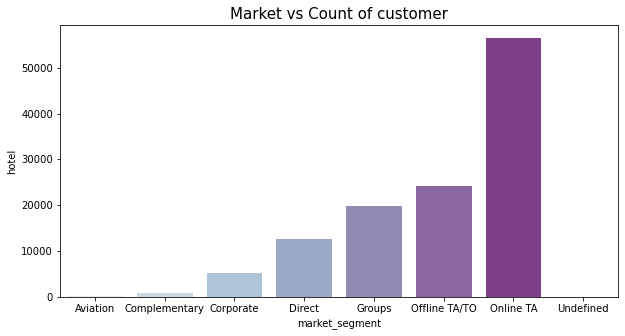

In [7]:
plot.figure(figsize = (10,5))
plot.title('Market vs Count of customer',size=15)
sns.barplot(data = hotel_y,x='market_segment',y='hotel',palette='BuPu')

# ---------------------------------------------------------------------------------------------------------------

## 8 how many booking room type is not same as assigned room type ? 

In [21]:
kl=list(hotel.reserved_room_type)
pl=list(hotel.assigned_room_type)

In [31]:
count=0
for i,j in zip(kl,pl):
    if i!=j:
        count+=1
    else:
        count+=0
print(f'Total customers which do not get rooms booked by them {count}')
               
    

Total customers which do not get rooms booked by them 14917


#### From total of 119390 bookings only 104473 get the rooms which are booked by them so what about other 14917 bookings why didn't they get the room which is booked by them .which systm is failed we have to look  in that case so we can improve this failure which will enhance customer experience whithus.

# ---------------------------------------------------------------------------------------------------------------

## 9. I am calculating type of meal taken by how many customers so can understand why revenue of restaurant are decreasing day day 

In [30]:
num_of_ad=hotel.groupby(['meal']).sum().reset_index()
num_of_ad[['meal','adults']]



,meal,adults
0,BB,170280
1,FB,1563
2,HB,27956
3,SC,19705
4,Undefined,2132


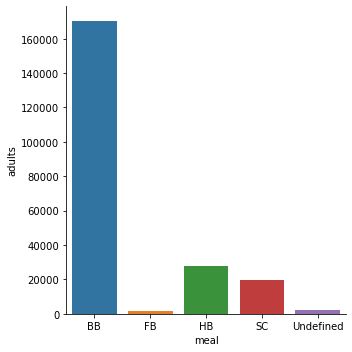

In [40]:
cou=num_of_ad[['meal','adults']
sns.catplot(x='meal',y='adults',data=cou,kind='bar')

##  10. Here iam calculating how many days have  ADR higher than Average ADR 

In [17]:
num_Adr = hotel['adr'].count()
Avg_adr=hotel['adr'].sum()//num_Adr
Avg_adr

101.0

In [18]:
gre_Avg=[]
small_avg=[]
for i,j in zip(hotel.arrival_date_month,hotel.adr):
    if j>Avg_adr:
        gre_Avg.append(i)
    else:
        small_avg.append(i)
        
print(len(gre_Avg))


51028


## So from total days from the hotel bookings 51028 days have ADR greater than avg ADR (Average Daily Rate ) it is the ratio of total room booking divided by total Room in hotel so extract information tell us about everydaya where ADR is greater than avg ADR .

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 11.changes of special requests year by year 

In [24]:
hotel.groupby(['arrival_date_year']).sum()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
arrival_date_year,,,,,,,,,,,,,,,,,,,
2015,8142,2139023,871459,344380,20450,54138,40262,1357.0,223,641,7400,702,3908,1482572.0,197924.0,50146,1917578.62,1352,9578
2016,20337,5833470,1613777,902271,50695,138524,104964,5908.0,463,1778,2518,8706,12750,4059014.0,534822.0,217407,5575764.71,3875,31112
2017,15745,4445430,758014,639501,39601,105849,76410,5138.0,263,1391,483,6960,9742,3392167.0,553700.0,9569,4664274.27,2237,27525


In [25]:
hotel2=hotel.groupby(['arrival_date_year']).sum().reset_index()

In [27]:
hotel3=hotel2[['arrival_date_year','total_of_special_requests']]

<AxesSubplot:title={'center':'arrival_date_year vs total_of_special_requests'}, xlabel='arrival_date_year', ylabel='total_of_special_requests'>

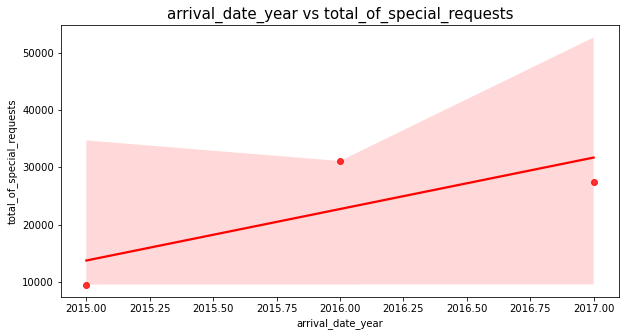

In [35]:
plot.figure(figsize = (10,5))
plot.title('arrival_date_year vs total_of_special_requests',size=15)
sns.regplot(x='arrival_date_year',y='total_of_special_requests',data=hotel3,color='Red')

## customer names who apply for special requests having baby

In [38]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [48]:
hotel[(hotel['babies']>0) &(hotel['children']>0) &(hotel['total_of_special_requests']>0) ].name.head(60)

272           Richard Ferguson
521             Crystal Wright
951                Amanda Page
998           Mr. William Bell
1081             Erica Jenkins
1339               John Brooks
3574             Gary Odonnell
7056            Andrew Pittman
8125          Rebecca Williams
8483               Austin Dunn
9041     Mrs. Gloria Gutierrez
9795                 Dean Reid
15814              Linda Clark
15898             Laura Castro
16119          Jeffery Mack MD
17027             Meagan White
17607                Katie Orr
19442             Robin Butler
19667              Tracy Patel
19721         Kimberly Simpson
21185         Cynthia Reynolds
23438            Jessica Boyer
23688               Karen Gray
24610             Karina Scott
24812             Natasha Gill
25035           Jessica Porter
25342          Joseph Gallegos
25356               Carla Choi
25540           Mr. Alan Adams
25591               Mary Davis
25726               Amber Wang
25758         Jennifer Jackson
26339   